In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
file_path = "Resources/Amazon.csv"
training_set = pd.read_csv(file_path)

2023-01-30 18:12:59.810427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
training_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-25,68.400002,68.917000,67.880997,68.897499,68.897499,95060000
1,2018-01-26,69.600502,70.126503,69.045502,70.102501,70.102501,97146000
2,2018-01-29,70.459000,71.569504,70.022003,70.884003,70.884003,114038000
3,2018-01-30,70.158501,71.962502,69.599998,71.890999,71.890999,117438000
4,2018-01-31,72.565002,73.628998,72.501999,72.544502,72.544502,128494000
...,...,...,...,...,...,...,...
1253,2023-01-18,97.250000,99.320000,95.379997,95.459999,95.459999,79570400
1254,2023-01-19,94.739998,95.440002,92.860001,93.680000,93.680000,69002700
1255,2023-01-20,93.860001,97.349998,93.199997,97.250000,97.250000,67307100
1256,2023-01-23,97.559998,97.779999,95.860001,97.519997,97.519997,76501100


In [3]:
print(type(training_set))

<class 'pandas.core.frame.DataFrame'>


In [4]:
training_set = training_set.iloc[:,1:2]
training_set

,Open
0,68.400002
1,69.600502
2,70.459000
3,70.158501
4,72.565002
...,...
1253,97.250000
1254,94.739998
1255,93.860001
1256,97.559998


In [5]:
training_set.values

array([[68.40000153],
       [69.60050201],
       [70.45899963],
       ...,
       [93.86000061],
       [97.55999756],
       [96.93000031]])

In [6]:
sc = MinMaxScaler()

training_set = sc.fit_transform(training_set)

In [7]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [8]:
X_train

array([[0.0091743 ],
       [0.01918681],
       [0.02634693],
       ...,
       [0.22885735],
       [0.22151792],
       [0.25237695]])

In [9]:
X_train = np.reshape(X_train,(1257,1,1))

In [10]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None,1)))

2023-01-30 18:13:24.566195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
regressor.fit(X_train, y_train, batch_size =32, epochs =200)

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.1222
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1179
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1138
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1099
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1061
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1025
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0992
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0961
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0932
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0905
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0880
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0857
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 103/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 104/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 105/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 106/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 107/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 108/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 109/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 110/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0243
Epoch 111/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 112/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 113/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 114/200
40/40 [=========

In [17]:
test_set = pd.read_csv(file_path)
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = sc.transform(inputs)
#inputs = np.reshape(inputs,(20,1,1))

In [18]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

40/40 [==============================] - 0s 996us/step


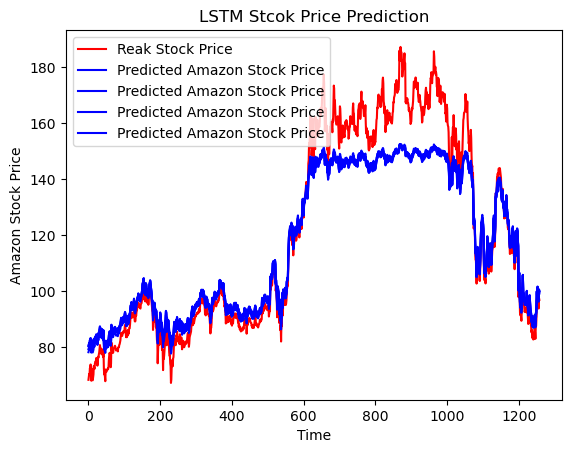

In [23]:
plt.plot(real_stock_price, color = 'red', label = 'Reak Stock Price')
plt.plot(predicted_stock_price,color = 'blue',label = 'Predicted Amazon Stock Price')
plt.title('LSTM Stcok Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()